In [ ]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


In [ ]:

dataset = pd.read_csv("Churn_Modelling.csv")


In [ ]:
X = dataset.iloc[:,3:13].values
type(X)

numpy.ndarray

In [ ]:
y = dataset.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()

X[:,2] = labelencoder.fit_transform(X[:,2])
X


X[:,1] = labelencoder.fit_transform(X[:,1])
X

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("country", OneHotEncoder(), [1])], remainder='passthrough')

X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
X = pd.DataFrame(X, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age", "Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
X

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [ ]:

X = X.drop("X1", axis=1)
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # 1) In the Class, StandardScaler was used. Here, MinMaxScaler is used.
sc1 = StandardScaler()
sc2 = MinMaxScaler(feature_range=[-1,1]) # 2) The functionality of MinMaxScaler is passed on to the variable sc2.

X_train = sc2.fit_transform(X_train)
X_test = sc2.transform(X_test)
# 3) MinMaxScaler is used for both X_train and X_test.
X

,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,0,0,619,0,42,2,0,1,1,1,101349
1,0,1,608,0,41,1,83807.9,1,0,1,112543
2,0,0,502,0,42,8,159661,3,1,0,113932
3,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270.6
9996,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,0,0,709,0,36,7,0,1,0,1,42085.6
9998,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU # 4) Additionally, LeakyReLU activation function was tried.
from keras.layers import Dropout # 5) Drop Out regularisation was used and the same is defined here.

classifier = Sequential()
# 6) 'Orthogonal' Kernel_initializer and 'tanh' activation function are used for Hidden Layer 1
classifier.add(Dense(units = 6, kernel_initializer = 'orthogonal', activation = 'tanh', input_dim = 11))
# 7) 'he_normal' kernel_initializer and 'elu' activation function are used for Hidden Layer 2
classifier.add(Dense(units = 6, kernel_initializer = 'he_normal', activation = 'elu'))
classifier.add(Dropout(0.1)) # 8) Drop Out Regularisation used before implementing the output layer.
# 9) 'Orthogonal' kernel initializer is used for the output layer.
classifier.add(Dense(units = 1, kernel_initializer = 'orthogonal', activation = 'sigmoid'))

ops = keras.optimizers.Adam(lr=0.01) # 10) Adam optimizer function with learning rate = 0.01 is passed on to the variable 'ops'
classifier.compile(optimizer = ops, loss = 'binary_crossentropy', metrics = ['accuracy']) # 11) Adam optimizer function with learning rate = 0.01 is used for the output layer.

classifier.fit(X_train, y_train, batch_size = 30, epochs = 100) # 12) Batch Size is made as 30 and Number of epochs is made as 100.

Epoch 1/100
267/267 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.7276
Epoch 2/100
267/267 [==============================] - 1s 2ms/step - loss: 0.4141 - accuracy: 0.8252
Epoch 3/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3807 - accuracy: 0.8414
Epoch 4/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8570
Epoch 5/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8559
Epoch 6/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8517
Epoch 7/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8530
Epoch 8/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8597
Epoch 9/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8554
Epoch 10/100
267/267 [==============================] - 1s 2ms/step - loss: 0.3500 - accura

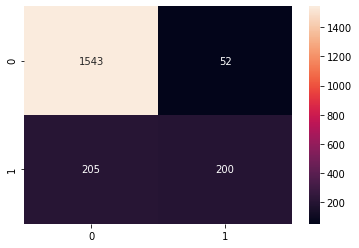

In [ ]:
import seaborn as sns

y_pred = classifier.predict(X_test)
# 13) The cut off value is made as '0.5324', which generated the maximum accuracy of 87.15%
y_pred = (y_pred > 0.5324)
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='')


In [5]:
accuracy = ((1543+200)/2000)*100
print((accuracy))

87.15
